In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics

In [147]:
# Read dataset to create dataframe
df= pd.read_csv('/content/sample_data/breast-cancer-data.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [148]:
# Info regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [149]:
# Check any null values exist
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [150]:
# Convert the diagnosis column to 1/0 and store in a new column target.
# Apply LabelEncoder to column 'diagnosis' and 
# create a column 'target' to store encoded data

le = LabelEncoder()
df['target'] = le.fit_transform(df['diagnosis'])

# drop columns
df.drop(columns=['diagnosis','area_mean','id','symmetry_mean','area_se','symmetry_se','area_worst','symmetry_worst'], inplace=True)
df.head()

,radius_mean,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,smoothness_se,compactness_se,concavity_se,concave points_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,0.11840,0.27760,0.3001,0.14710,0.07871,1.0950,0.9053,8.589,0.006399,0.04904,0.05373,0.01587,0.006193,25.38,17.33,184.60,0.1622,0.6656,0.7119,0.2654,0.11890,1
1,20.57,17.77,132.90,0.08474,0.07864,0.0869,0.07017,0.05667,0.5435,0.7339,3.398,0.005225,0.01308,0.01860,0.01340,0.003532,24.99,23.41,158.80,0.1238,0.1866,0.2416,0.1860,0.08902,1
2,19.69,21.25,130.00,0.10960,0.15990,0.1974,0.12790,0.05999,0.7456,0.7869,4.585,0.006150,0.04006,0.03832,0.02058,0.004571,23.57,25.53,152.50,0.1444,0.4245,0.4504,0.2430,0.08758,1
3,11.42,20.38,77.58,0.14250,0.28390,0.2414,0.10520,0.09744,0.4956,1.1560,3.445,0.009110,0.07458,0.05661,0.01867,0.009208,14.91,26.50,98.87,0.2098,0.8663,0.6869,0.2575,0.17300,1
4,20.29,14.34,135.10,0.10030,0.13280,0.1980,0.10430,0.05883,0.7572,0.7813,5.438,0.011490,0.02461,0.05688,0.01885,0.005115,22.54,16.67,152.20,0.1374,0.2050,0.4000,0.1625,0.07678,1


In [151]:
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'fractal_dimension_worst',
       'target'],
      dtype='object')

In [152]:
# Apply StandardScaler to scale dataframe
scalar= StandardScaler()
scaled_df = scalar.fit_transform(df)
scaled_df

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         1.93701461,  1.29767572],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
         0.28118999,  1.29767572],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         0.20139121,  1.29767572],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -0.31840916,  1.29767572],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         2.21963528,  1.29767572],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.75120669, -0.77060855]])

In [153]:
# Convert scaled dataset to dataframe
df_new = pd.DataFrame(scaled_df, columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'fractal_dimension_worst',
       'target'])

# Split fetures and target dataset
X,y = df_new.drop(['target'], axis=1),df_new['target']

In [154]:
# check score of PCA with 2 components
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(scaled_df)
pca_scores

array([[ 8.16938388,  1.12086385],
       [ 1.69288551, -3.25700199],
       [ 5.09855035, -1.44082941],
       ...,
       [ 1.62364566, -1.67630699],
       [ 9.89323957,  0.59150583],
       [-5.30716664, -0.68653961]])

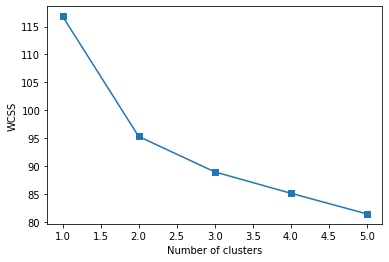

In [155]:
# elbow method to identify optimum no: of clusters of features
wcss = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    wcss.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 6), wcss, marker='s');
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');



After using Elbow method, we got the optimum no:of clusters =3

In [157]:
# Transform this data to its first 2 principal components.
# convert our dataset from multidimensions to 2 dimensions.
pca = PCA(2)
data = pca.fit_transform(X)
# access values and vectors
# print(pca.components_)
print("Original data shape ",X.shape)
print("Transformed data shape ",data.shape)
print(np.cumsum(pca.fit(X).explained_variance_ratio_))

Original data shape  (569, 24)
Transformed data shape  (569, 2)
[0.46193853 0.65026961]


In [43]:
df_pca_2 = pd.DataFrame(data=data, columns=['PC1','PC2'])
pca_2_df = pd.concat([df_pca_2, y.to_frame()], axis = 1)
pca_2_df.head()


,PC1,PC2,target
0,8.116323,0.858331,1.297676
1,1.365736,-3.192362,1.297676
2,4.901413,-1.546180,1.297676
3,7.333377,7.358345,1.297676
4,3.321398,-1.464089,1.297676


In [158]:
# Transform this data to its first 3 principal components.
#convert our dataset from multidimensions to 3 dimensions.
pca_3 = PCA(3)
data_3 = pca_3.fit_transform(X)
# access values and vectors
# print(pca_3.components_)
print("Original data shape ",X.shape)
print("Transformed data shape ",data_3.shape)
print(np.cumsum(pca_3.fit(X).explained_variance_ratio_))

Original data shape  (569, 24)
Transformed data shape  (569, 3)
[0.46193853 0.65026961 0.74585956]


In [91]:
type(data_3)

numpy.ndarray

In [52]:
df_pca_3 = pd.DataFrame(data=data_3, columns=['PC1','PC2','PC3'])
pca_3_df = pd.concat([df_pca_3, y.to_frame()], axis = 1)
pca_3_df.head()

,PC1,PC2,PC3,target
0,8.116323,0.858331,-2.078021,1.297676
1,1.365736,-3.192362,-0.586660,1.297676
2,4.901413,-1.546180,-0.590504,1.297676
3,7.333377,7.358345,-3.427547,1.297676
4,3.321398,-1.464089,0.473797,1.297676


In [156]:
# Print the explained variance.
exp_var_cumsum=pd.Series(np.round(pca_3.fit(X).explained_variance_ratio_.cumsum(),4)*100)  
for index,var in enumerate(exp_var_cumsum):  
    print('if n_components= %d,   variance=%f' %(index+1,np.round(var,3)))

if n_components= 1,   variance=46.190000
if n_components= 2,   variance=65.030000
if n_components= 3,   variance=74.590000


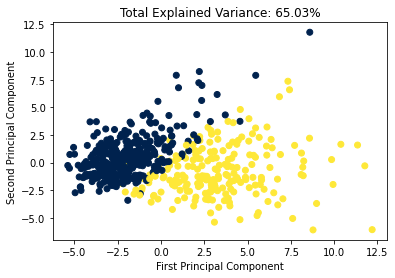

In [178]:
# Plot the two dimensions.
total_var = pca.fit(X).explained_variance_ratio_.sum() * 100
plt.scatter(pca_2_df['PC1'],pca_2_df['PC2'], c=df['target'], cmap='cividis')
plt.title(f'Total Explained Variance: {total_var:.2f}%')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [179]:
# Plot the three dimensions.
import plotly.express as px
total_var = pca_3.fit(X).explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    data_3, x=0, y=1, z=2, color=df['target'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()


**Unsupervised metrics calculation**

In [61]:
# Calculate the PCA metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering
metrics_data =[]
model = KMeans(n_clusters = 3, init = "k-means++", random_state=1)
# model =SpectralClustering(n_clusters=3, random_state=1,
#                                      affinity='nearest_neighbors')
#model= AgglomerativeClustering(n_clusters=3)
pca_data=[df_pca_2, df_pca_3]
for x in pca_data:
  label = model.fit(x)

  metrics_data.append({
          'ARI': metrics.adjusted_rand_score(y, label.labels_),
          'AMI': metrics.adjusted_mutual_info_score(y, label.labels_,
                                                  average_method='arithmetic'),
          'Homogenity': metrics.homogeneity_score(y, label.labels_),
          'Completeness': metrics.completeness_score(y, label.labels_),
          'V-measure': metrics.v_measure_score(y, label.labels_),
          'Silhouette': metrics.silhouette_score(X, label.labels_)})



results = pd.DataFrame(data=metrics_data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means-PCA-2', 'K-means-PCA-3'])

results


,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means-PCA-2,0.519267,0.441899,0.537487,0.376955,0.443130,0.318496
K-means-PCA-3,0.505578,0.426815,0.519170,0.364182,0.428079,0.316187


Adjusted Rand Index (ARI):
positive ARI values indicate that these splits are consistent [0,1]

Adjusted Mutual Information (AMI)
Similarly to the ARI, the AMI is defined.Values close to zero mean the splits are independent, and those close to 1 mean they are similar (with complete match at AMI=1)

Homogeneity, completeness, V-measure


**Check the accuracy for 2nd and 3rd components.**

In [161]:
pca_2_X  = pca_2_df.drop(['target'], axis=1)
pca_3_X  = pca_3_df.drop(['target'], axis=1)

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [163]:
#splitting dataset into a training set and test set

X_train, X_test, y_train, y_test = train_test_split(pca_2_X, df['target'], test_size=0.3, random_state = 1)

In [164]:
model = LogisticRegression()

model.fit(X_train, y_train)

#predicting results

y_pred = model.predict(X_test)

accuracy_pca_2 = metrics.accuracy_score(y_test,y_pred)

In [165]:
#splitting dataset into a training set and test set

X_train, X_test, y_train, y_test = train_test_split(pca_3_X, df['target'], test_size=0.3, random_state = 1)

In [166]:
model = LogisticRegression()

model.fit(X_train, y_train)

#predicting results

y_pred = model.predict(X_test)

accuracy_pca_3 = metrics.accuracy_score(y_test,y_pred)

In [167]:
print("accuracy score after transforming PCA with n_component = 2:", accuracy_pca_2)
print("accuracy score after transforming PCA with n_component = 3:", accuracy_pca_3)

accuracy score after transforming PCA with n_component = 2: 0.9415204678362573
accuracy score after transforming PCA with n_component = 3: 0.935672514619883
